# COVID-19 Risk Factors: A Comparative Study of COVID Rates
Dataset - https://www.kaggle.com/datasets/meirnizri/covid19-dataset

In March of 2020 COVID-19 changed out modern society and community. The pandemic caused strain on many individuals and led to hundreds of thousands of deaths over the entirety of the project. It is up for debate by many as to what the specific harm of COVID is on the body. While I do not aim to specifically analyze the aftereffects on the COVID virus on the body, I do hope to dissect and analyze several different risk factors and their affect in the transmission and positive testing of the SARS-CoV-2 virus, otherwise known as COVID. 

The dataset I am going to discuss is a study conducted that record various amounts of attributes of patients, including sex, age, disease, and COVID classification. I picked this dataset becasue it was inetresting to visualize and invetsigate the relationship between these factors and COVID transmission.

At the beginning of my process, I first aimed to look at and analyze the death rates of COVID throughout the pandemic. However, as I came upon this dataset, I felt it very important to educate myself on the risk factors that contribute to the increased transmission of COVID. Even throughout the process of creating this project, I experienced several pitfalls and roadblocks in transferring the data to a hard faceted story to describe a problem. The main problem I experienced was the lack of transferrable data making some facets of the data un-usable. 

I feel that the visualizations we are going to explore are key in understanding the relationship between certain traits and characteristics such as sex, age, and disease in relation to COVID transmission. The visualizations are placed to aid in the discussion of the numbers and directly visualize the differences in data. One of the drawbacks of using the visualizations I do is that they may lead to different inferences of data inferences. While I do believe the visualizations are key in physically seeing the data in comparison with other data and statistics, it is not always as indicative of a change or difference. Simply, a small increase in positive COVID tests can appear as a larger one as the visualziations sometimes show.

To properly read/interperet the data at hand, I took liberties to change the appearance and remove certain statistics I felt as unnecessary or did not contribute to the overall discussion of the questions at hand. This included: 
- Removing the columns that’s I did not want to use in my visualizations. These were USMER, MEDICAL_UNIT, INTUBED, PNEUMONIA, PREGNANT, COPD, ASTHMA, INMSUPR, OTHER_DISEASE, RENAL_CHRONIC, TOBACCO, ICU. While I do think that there is very good data to be read from things like ICU and Medical Unit in terms of COVID severity, there was a very large lack of data inputted in there to make it properly readable/usable. After removing all the data that was listed unavailable the dataset went from over 1,000,000 entries to only 80,000 entries. I felt as if there would be a large tradeoff when it came to analysis of the data.

- Removing any unavailable data from the columns. This allows me to better compare the stats, specifically in terms of relations to one another. 

- Transforming the data represented as integers to strings. Most of the raw data in the dataset was listed as 1,2, 97, 98, or 99. This made it very hard to look at visually, but also made the data very messy in terms of coding. In order to clean up the data and make it more efficient I took each columns data and turned it into the corresponding result.

- Changing the COVID classfication. The dataset includes number 1-7 that indicates the severity of the COVID diqgnoses. 1-3 being positive and 4-7 being negative. However, the study does not dilenate the scale tha is used. It is intuitive to think 1 would be the worst case of COVID and 3 being the least significant case. However, due to the fact there is no delineation of what the scale is in this context, I felt it was important to classify COVID into 2 categories; positive and negative. This allows me to look at the numbers for each in much more user friendly way and create better relationship mapping. 


## Gathering Information and Reading the Data
The following code segements are being used to gather the data and clean it up in ways that make it easier for you, me, and the software to parse throgh when calling the specific data we need to use/analyze.

In [25]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [26]:
# Import the COVID dataset
df = pd.read_csv('Covid_Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [27]:
# We need to remove all of the data we are not going to deal with.  
cols = ['USMER','MEDICAL_UNIT', 'INTUBED', 'PNEUMONIA',  'PREGNANT', 'COPD', 'ASTHMA', 'INMSUPR','OTHER_DISEASE', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']
df2 = df.drop(cols, axis=1)
df2.head()

,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,HIPERTENSION,CARDIOVASCULAR,OBESITY,CLASIFFICATION_FINAL
0,1,1,03/05/2020,65,2,1,2,2,3
1,2,1,03/06/2020,72,2,1,2,1,5
2,2,2,09/06/2020,55,1,2,2,2,3
3,1,1,12/06/2020,53,2,2,2,2,7
4,2,1,21/06/2020,68,1,1,2,2,3


In [28]:
# Now we need to remove the data in the columns we kept that came back unavailable. Those are indicated by the values 97, 98, or 99. 
na1 = 97
na2 = 98
na3 = 99
df2 = df2[~df2.isin([na1, na2, na3]).any(axis=1)]
df2.head()

,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,HIPERTENSION,CARDIOVASCULAR,OBESITY,CLASIFFICATION_FINAL
0,1,1,03/05/2020,65,2,1,2,2,3
1,2,1,03/06/2020,72,2,1,2,1,5
2,2,2,09/06/2020,55,1,2,2,2,3
3,1,1,12/06/2020,53,2,2,2,2,7
4,2,1,21/06/2020,68,1,1,2,2,3


In [29]:
# Let's clean up the data to make it more readable/code friendly.
df2['SEX'].replace(1, 'Male', inplace=True)
df2['SEX'].replace(2, 'Female', inplace=True)

df2['PATIENT_TYPE'].replace(1, 'Sent Home', inplace=True)
df2['PATIENT_TYPE'].replace(2, 'Hospitalized', inplace=True)

df2['DIABETES'].replace(1, 'Yes', inplace=True)
df2['DIABETES'].replace(2, 'No', inplace=True)

df2['HIPERTENSION'].replace(1, 'Yes', inplace=True)
df2['HIPERTENSION'].replace(2, 'No', inplace=True)

df2['CARDIOVASCULAR'].replace(1, 'Yes', inplace=True)
df2['CARDIOVASCULAR'].replace(2, 'No', inplace=True)

df2['OBESITY'].replace(1, 'Yes', inplace=True)
df2['OBESITY'].replace(2, 'No', inplace=True)

df2['CLASIFFICATION_FINAL'].replace(1, 'COVID Positive', inplace=True)
df2['CLASIFFICATION_FINAL'].replace(2, 'COVID Positive', inplace=True)
df2['CLASIFFICATION_FINAL'].replace(3, 'COVID Positive', inplace=True)
df2['CLASIFFICATION_FINAL'].replace(4, 'COVID Negative', inplace=True)
df2['CLASIFFICATION_FINAL'].replace(5, 'COVID Negative', inplace=True)
df2['CLASIFFICATION_FINAL'].replace(6, 'COVID Negative', inplace=True)
df2['CLASIFFICATION_FINAL'].replace(7, 'COVID Negative', inplace=True)

df2.head()

,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,HIPERTENSION,CARDIOVASCULAR,OBESITY,CLASIFFICATION_FINAL
0,Male,Sent Home,03/05/2020,65,No,Yes,No,No,COVID Positive
1,Female,Sent Home,03/06/2020,72,No,Yes,No,Yes,COVID Negative
2,Female,Hospitalized,09/06/2020,55,Yes,No,No,No,COVID Positive
3,Male,Sent Home,12/06/2020,53,No,No,No,No,COVID Negative
4,Female,Sent Home,21/06/2020,68,Yes,Yes,No,No,COVID Positive


### Statistics Dictionary
There are 21 total data values, however I am going to be focusing on 8 of the data values. Sex, patient type date of death, age, diabetes, hypertension, obesity, cardiovascular and/or blood related issues, and COVID classification.

   1. Sex - indicates the sex of the patient. 
   2. Date Died - indicates the death date of a patient and 9999-99-99 otherwise.
   3. Age - indicates the age of the patient. 
   4. Diabetes - indicates if the pateint has diabetes. 
   5. Hypertension - indicaates if the pateint experiences hypertension. 
   6. Cardiovascular - indicates if the patient has heart or blood related diseases. 
   7. Obesity - indicates if the patient is obese. 
   8. Classification Final - result of COVID testing. 

# 1. SEX

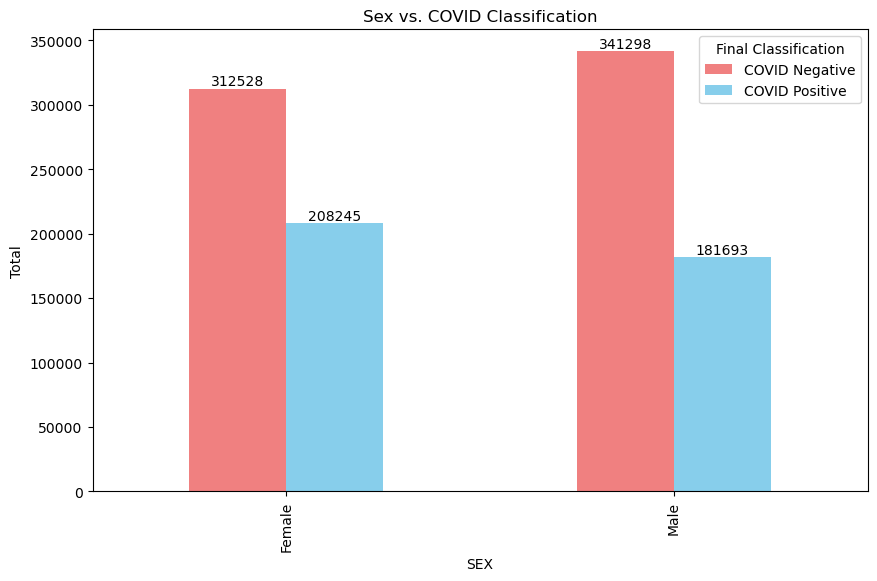

In [44]:
colors = ['lightcoral', 'skyblue']
sex_covid_counts = df2.groupby(['SEX', 'CLASIFFICATION_FINAL']).size()
sex_covid_counts = sex_covid_counts.unstack()

ax = sex_covid_counts.plot(kind='bar', figsize=(10, 6), color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Sex vs. COVID Classification")
plt.xlabel('SEX')
plt.ylabel('Total')
plt.legend(title='Final Classification')
plt.show()

### Analysis: 
This visualization shows us the relationship between sex and COVID transmission. Out of the 520,773
females represented in the study, approximately 39.98% tested positive for COVID and 60.02% tested nagative. Out of the 522,991 males represented in the study, approximately 34.72% tested positive and 65.28% tested negative. Now, taking a look at the general population of the study, positive cases for women represent 19.9% and men 17.36%. The data and visualizations are indicative of the increased chance of women contracting COVID compared to men.

# 2. DEATH

In [40]:
# Lets remove any data with '9999-99-99' in it.
da1 = '9999-99-99'
df3 = df2[~df2.isin([da1]).any(axis=1)]

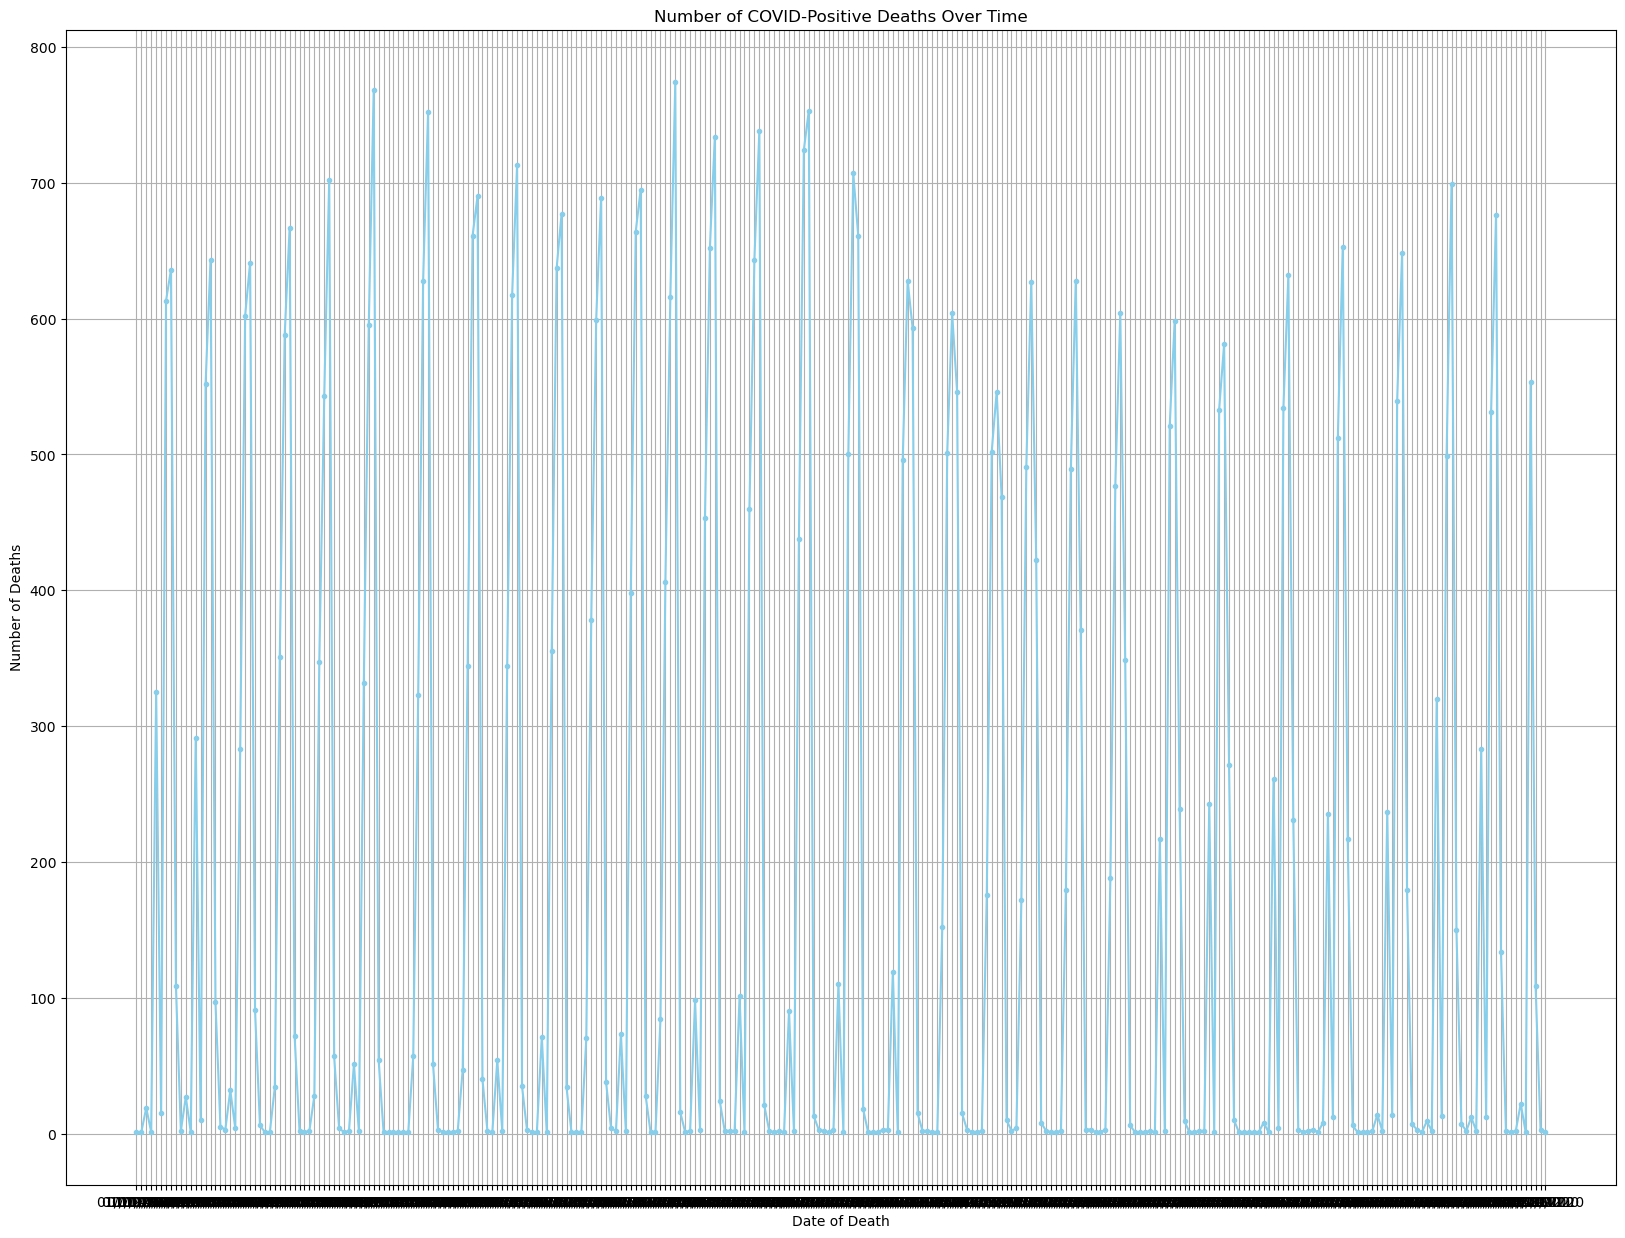

In [45]:
covid_positive_data = df3[df3['CLASIFFICATION_FINAL'] == 'COVID Positive']
data = covid_positive_data.groupby('DATE_DIED').size()
plt.figure(figsize=(20, 15))
plt.plot(data.index, data.values, marker='.', linestyle='-', color = 'skyblue')
plt.title('Number of COVID-Positive Deaths Over Time')
plt.xlabel('Date of Death')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

### Analysis:
This graph shows the general trend of deahts over time for the patients recorded as COVID positive. As shown there is a spike in deaths for COVID posotive patients during the time at which COVID outbreak was in its peak. This data while not truly indicative of the response and imppact COVID has paired with other disease factors, does point to significant claims that death rates are exponential in nature and precations during pandemics should be taken. 

# 3. Age

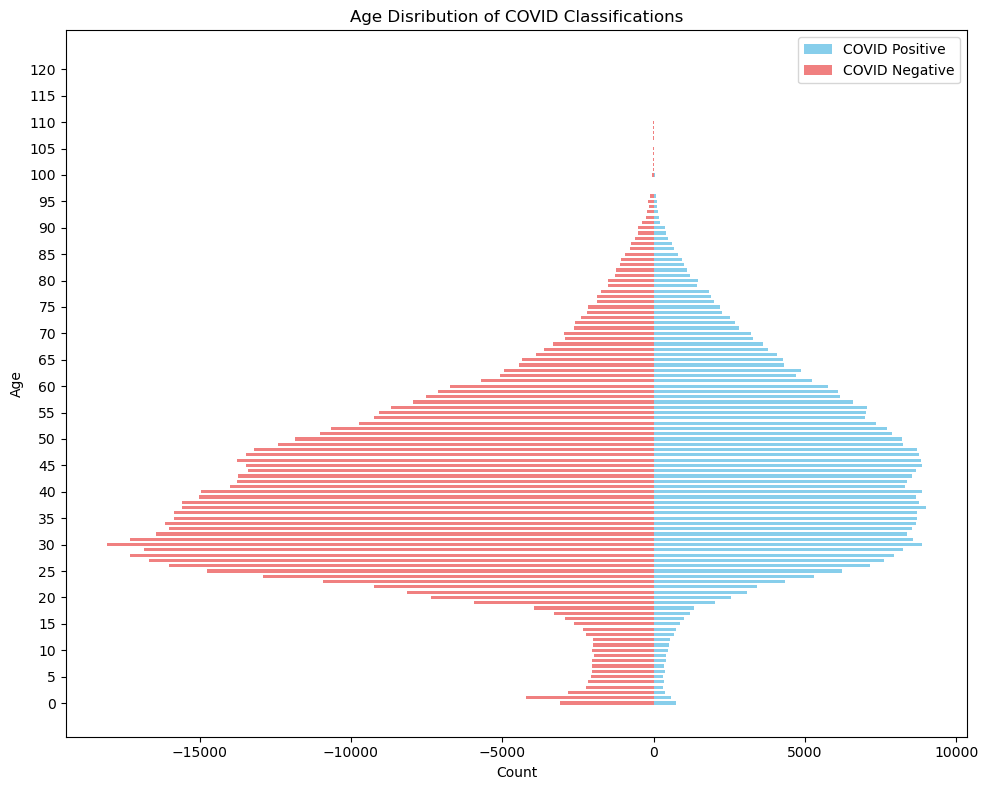

In [33]:
covid_positive = df2[df2['CLASIFFICATION_FINAL'] == 'COVID Positive']
covid_negative = df2[df2['CLASIFFICATION_FINAL'] == 'COVID Negative']
age_counts_positive = covid_positive['AGE'].value_counts().sort_index()
age_counts_negative = covid_negative['AGE'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(age_counts_positive.index, age_counts_positive.values, color='skyblue', label='COVID Positive', height=0.6)

ax.barh(age_counts_negative.index, -age_counts_negative.values, color='lightcoral', label='COVID Negative', height=0.6)

plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Age Disribution of COVID Classifications')
plt.legend()

ax.set_yticks(range(0, max(df2['AGE']) + 1, 5))
ax.set_yticklabels([str(age) for age in range(0, max(df2['AGE']) + 1, 5)])

plt.tight_layout()
plt.show()

In [34]:
# Lets grab some data for statistics every for every 30th age group.
print(age_counts_positive[0]) #positive 0 year olds.
print(age_counts_negative[0]) #negative 0 year olds.

print(age_counts_positive[30]) #positive 30 year olds.
print(age_counts_negative[30]) #negative 30 year olds.

print(age_counts_positive[60]) #positive 60 year olds.
print(age_counts_negative[60]) #negative 60 year olds.

print(age_counts_positive[90]) #positive 90 year olds.
print(age_counts_negative[90]) #negative 90 year olds.

739
3099
8875
18064
5757
6721
369
524


### Analysis:
This visualization explores the distribution of ages among the COVID classifications. The data shown is indicative of a strong relationship between age and transmission of COVID-19. Looking at groups of ages every 30 years I found an interesting relationship. 

- 0-year old’s: out of the 3,838 approximately 19.24% tested positive for covid and 80.76% tested negative. 
- 30-year old’s: out of the 26,939 approximately 32.96% tested positive and 67.04% tested negative. 
- 60-year old’s: out of the 12,478 approximately 46.1% tested positive and 53.9% tested negative. 
- 90-year old’s: out of the 893 approximately 41.3% tested positive and 58.7% tested negative. 

Based on the statistics we can conclude that there is a higher risk of testing positive for COVID among older ages. 

# 4. Diabetes

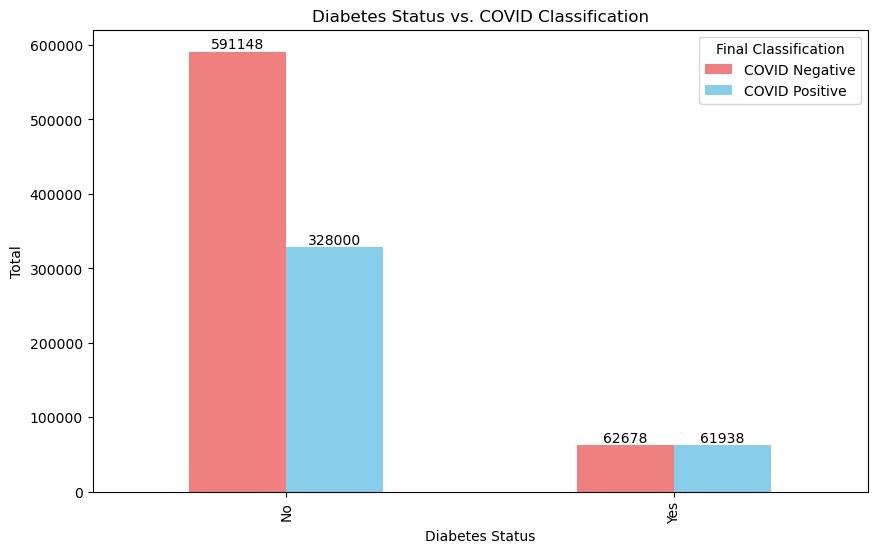

In [35]:
colors = ['lightcoral', 'skyblue']
diabetes_covid_counts = df2.groupby(['DIABETES', 'CLASIFFICATION_FINAL']).size()
diabetes_covid_counts = diabetes_covid_counts.unstack()

ax = diabetes_covid_counts.plot(kind='bar', figsize=(10, 6), color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Diabetes Status vs. COVID Classification")
plt.xlabel('Diabetes Status')
plt.ylabel('Total')
plt.legend(title='Final Classification')
plt.show()

### Analysis:
The data shown represents the number of diabetic and non-diabetic patients and their final COVID classification. Of the 124,616 diabetic patients 49.70% tested positive for COVID and 50.30% tested negative. Of the 919,148 nondiabetic patients, only 35.64% tested positive for COVID and 64.36% tested negative. The data indicates that there is a 13.9% greater risk among diabetic patients of contracting COVID. This exemplifies the increased risk that immunocompromised individuals face when it comes to COVID transmission

# 5. Hypertension

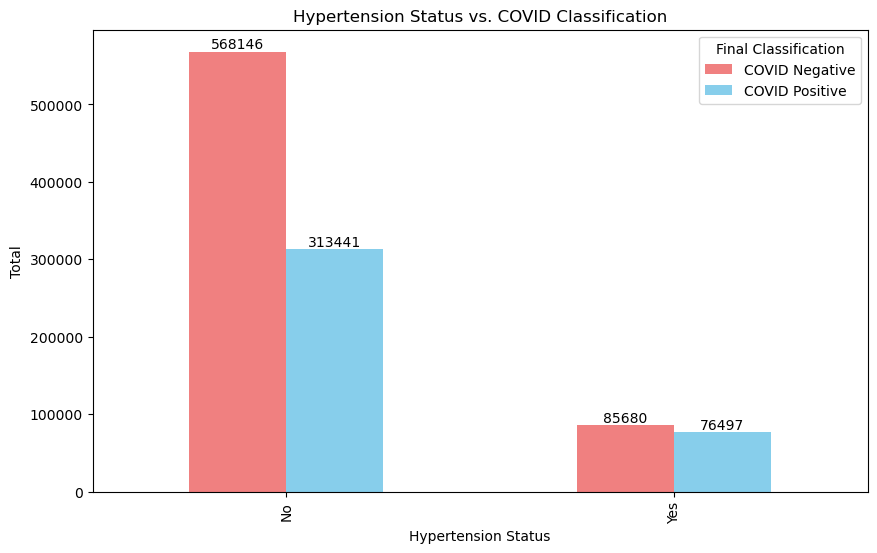

In [36]:
colors = ['lightcoral', 'skyblue']
hypertension_covid_counts = df2.groupby(['HIPERTENSION', 'CLASIFFICATION_FINAL']).size()
hypertension_covid_counts = hypertension_covid_counts.unstack()

ax = hypertension_covid_counts.plot(kind='bar', figsize=(10, 6), color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Hypertension Status vs. COVID Classification")
plt.xlabel('Hypertension Status')
plt.ylabel('Total')
plt.legend(title='Final Classification')
plt.show()

### Analysis:
The data shown represents the number of patients expereicing hypertension and patients who dont and their final COVID classification. Of the 162,147 patients who reported that they did expereince hypertension, 52.89% tested positive for COVID and 47.11% tested negative. Of the 881,593 patients who reported they did not expereince hypertension, approximately 35.50% tested psotove fro COVID and 64.5% tested negative. This indiactes there is a 17.39% greater chance that a given patient with hypertension will conctract COVID.

# 6. Cardiovascular/Blood Related Illness

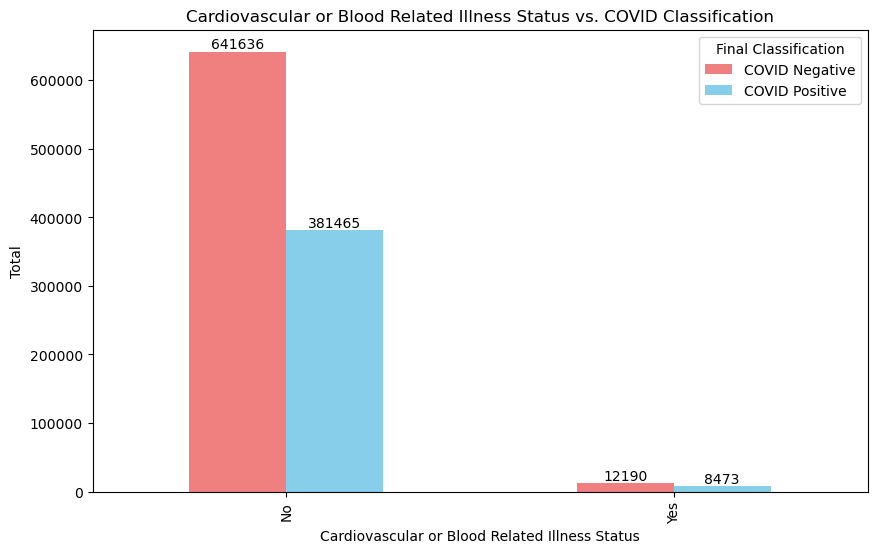

In [37]:
colors = ['lightcoral', 'skyblue']
cardio_covid_counts = df2.groupby(['CARDIOVASCULAR', 'CLASIFFICATION_FINAL']).size()
cardio_covid_counts = cardio_covid_counts.unstack()

ax = cardio_covid_counts.plot(kind='bar', figsize=(10, 6), color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Cardiovascular or Blood Related Illness Status vs. COVID Classification")
plt.xlabel('Cardiovascular or Blood Related Illness Status')
plt.ylabel('Total')
plt.legend(title='Final Classification')
plt.show()

### Analysis:
The visualiation shown indicates the relationship between cardiovascular and/or blood related issues and COVID contraction. Of the 20,663 patients who indicated that they have a history of cardiovascular and/or blood related issues, approximately 41.00% tested positive for COVID and 59.00% tested negative. Of the 1,023,101 patients who did listed no history of cardiovascular and/or blood related issues 37.2% tested positve for COVID and 62.8% tested negative. This relationship may indicate that while there is greater risk of pateints with cardovascular issues to contract COVID, it is not as prevelant as some of the ther risk factors discussed in the study. 

# 7. OBESITY

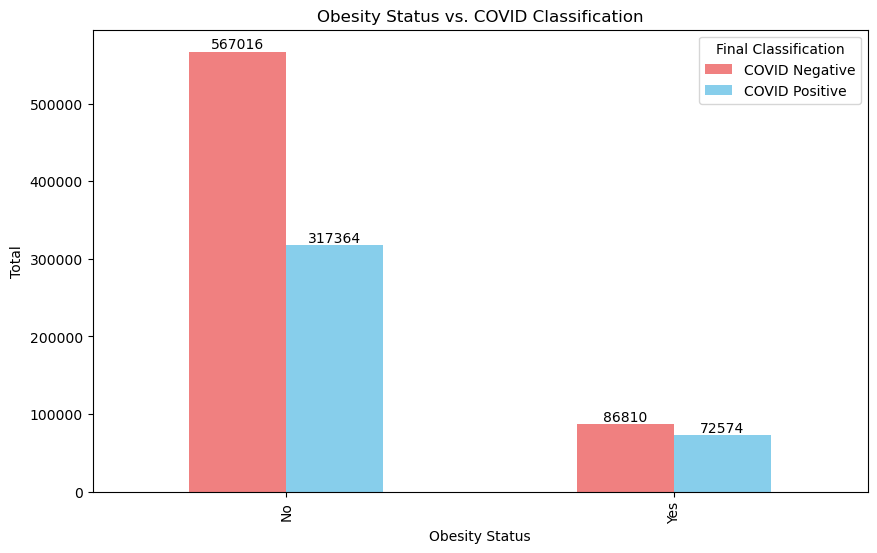

In [38]:
colors = ['lightcoral', 'skyblue']
obesity_covid_counts = df2.groupby(['OBESITY', 'CLASIFFICATION_FINAL']).size()
obesity_covid_counts = obesity_covid_counts.unstack()

ax = obesity_covid_counts.plot(kind='bar', figsize=(10, 6), color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Obesity Status vs. COVID Classification")
plt.xlabel('Obesity Status')
plt.ylabel('Total')
plt.legend(title='Final Classification')
plt.show()

### Analysis:
The visualiation shown indicates the relationship between obesity and COVID contraction. Of the 159,384 patients recorded who showed signs/ had obesity, approximately 46.76% tested positive for COVID, and 53.24% tested negative. of the 884,382 patients who did not show signs/have obesity, approximately 35.87% tested positive for COVID and 64.13% tested negative. The findings indicate that there is a approximately a 10.89% higher chance of contracting/testing positive for COVID. 

# Risk Factor Combinations and Their Rates of COVID Transmission
This vizualization maps the probability of COVID transmission for each grouping of risk factors we ave discussed thus far. In repsective order Diabetes, Hypertension, and Cardiovascular and/or blood related issues. 

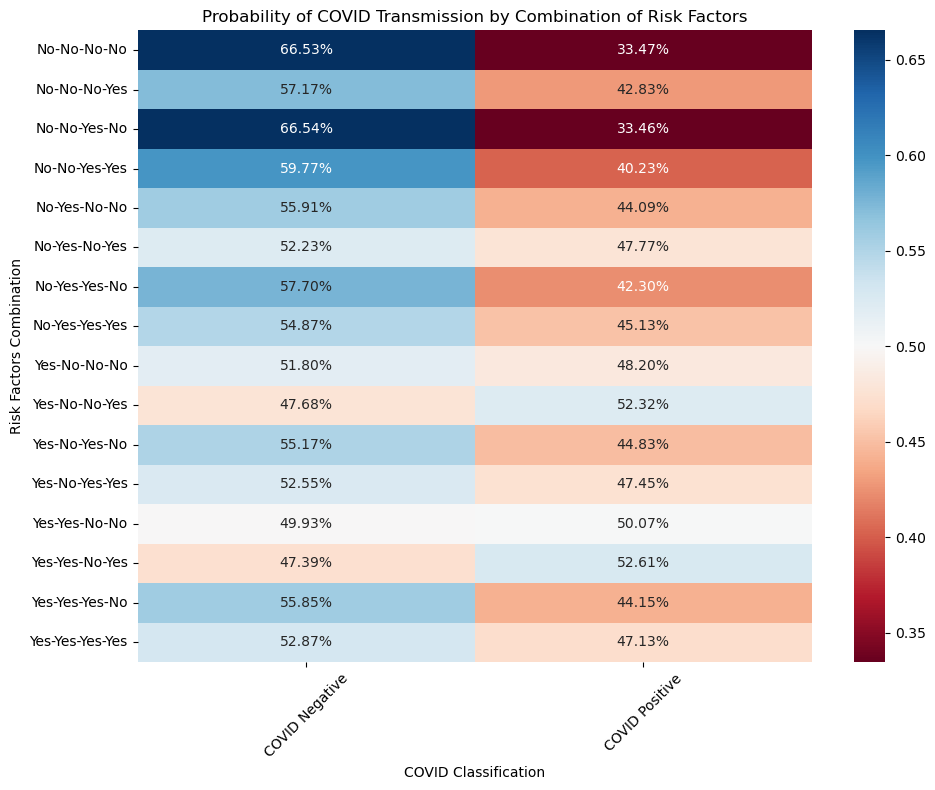

In [39]:
risk_factors = ['DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY']
probabilities = df2.groupby(risk_factors + ['CLASIFFICATION_FINAL']).size().unstack(fill_value=0)

total_cases = probabilities.sum(axis=1)

probabilities = probabilities.div(total_cases, axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(probabilities, annot=True, cmap='RdBu', fmt='.2%')
plt.title('Probability of COVID Transmission by Combination of Risk Factors')
plt.xlabel('COVID Classification')
plt.ylabel('Risk Factors Combination')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Analysis: 
The data shown allows us to make the assumption that the certain cobinations of risk factors have a different effect on COVID transmission. Patients who had none of the stated risk factors and patients with only cardiovascular issues experienced the lowest percentage of positive COVID results, sitting at 33.47% and 33.46% respectivley. This data comes at a suprise as it indicates that heart and/or blood related issues may not increase the risk of COVID transmission. Of the combiniations that represent the highest rate of positive COVID tests, patients with diabetes, hypertension, and obesity took first place, sitting at 52.61%. This indiactes there is an increased risk of contracting COVID among those who have these risk factors. 

# Conclusion and Final Thoughts

Looking at both the data and the visualizations created, I feel that there is a strong indication that there is at least some risk associated with certain physiological and health factors when it comes to COVID transmission and contraction. The data visualizations explore this relationship deeply and allows us to better contextualize the risks involved with COVID. 

My design decision reflects the connection between visualizing real life statistics to conceptualize the risks and problems, especially in times of struggle like the COVID pandemic. I feel that visually representing the differences that certain health factors, conditions, and patients’ aspects through visuals brings light to the extremities of both COVID and overarching lack of care for others with these risk factors. 

During the creative process of this project, there were several failed attempts at linking more data and creating more intricate visualizations. However due to lack of my experience in coding and the lack of correctly formatted data, there were some data that was lost or was unable to be transferred into the visualizations I set out to curate. The following setbacks were the most time consuming:
- As I stated before there was a large amount of data that was missing or input into the data set as unavailable (represented as 97, 98, or 99). All data areas I excluded from the project contain too many missing variables to be able to answer the final question at hand. I felt as though it was integral to remove any data with an excess of missing information, so the visualizations represent the highest number of data possible. I overcame this by removing the column that contained the highest amount of missing data. This made the total number of data entries missing as I removed missing data be significantly higher than when I simply removed the missing data without removing columns.

- I had originally hoped to compare the percent of covid patients who died and those who did not, however, the date input denotes survival or no death as '9999-99-99' making it substantially harder to parse through the data given to find if the patient died or not. I think that this visualization would have been a keyway to express the severity of COVID. Additionally, I feel that having this data would have also allowed me to track the deaths per combination of risk factors. This answers the question I wanted to start with but was unable to answer with the data I ended up being able to use.

To better conceptualize the question at hand, in the future I would take more time to sort through the data and make data range be far wider. This means I would keep the columns I removed and instead use the data given more carefully. I would also take the time to create more intricately design visualizations. I feel that a second chance at revising the data and taking more time to dedicate to the coding aspect would certainly advance the data narrative. 

While I believe the data and visualizations to be somewhat representaive and/or applicable to the larger population, I feel that it is not entirely something to be taken as the end all for analysis of risk factors. This data and visualizations need to be paried with dozens of other studies and multidisciplinary research methods in order ot make large conclusions. I think that an iteration of this study in companion with outside research and sudies would make this data far more applicable to findings and conclusions than it is now.

The creative process of the data narrative creation is one that I had little experience with outside of the academic sphere. Even then my experience with it remained limited. I think that my favorite aspect of learning how to create data narratives is the transferability of data literacy skills to other aspects of the life. I never realized how much data narratives are interconnected with my daily life until I had one in front of me, was told to dissect it and then create visualizations. I have used this same technique of analyzing and dissecting data before, but this project has forced me to use that skill in ways that I have never quite been told to. 